<a href="https://colab.research.google.com/github/MeenakshiMony/E-Commerce_Customer_Churn_Analysis_Prediction/blob/main/E_Commerce_Customer_Churn_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Setting Up Google Colab & Essential Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the dataset

In [163]:
# Load the dataset
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name='E Comm')

### Step 3: Basic Data Inspection

In [164]:
# Initial exploration
print("Dataset shape:", df.shape)
print("\nFirst 3 rows:")
display(df.head(3))

Dataset shape: (5630, 20)

First 3 rows:


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.00,Mobile Phone,3,6.00,Debit Card,Female,3.00,3,Laptop & Accessory,2,Single,9,1,11.00,1.00,1.00,5.00,159.93
1,50002,1,NaN,Phone,1,8.00,UPI,Male,3.00,4,Mobile,3,Single,7,1,15.00,0.00,1.00,0.00,120.90
2,50003,1,NaN,Phone,1,30.00,Debit Card,Male,2.00,4,Mobile,3,Single,6,1,14.00,0.00,1.00,3.00,120.28


In [165]:
print("🔍 Data Types & Missing Values:")
df.info()

🔍 Data Types & Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   

Missing values:
                              count  percent
DaySinceLastOrder              307     5.45
OrderAmountHikeFromlastYear    265     4.71
Tenure                         264     4.69
OrderCount                     258     4.58
CouponUsed                     256     4.55
HourSpendOnApp                 255     4.53
WarehouseToHome                251     4.46
CustomerID                       0     0.00
PreferredLoginDevice             0     0.00
Churn                            0     0.00
PreferredPaymentMode             0     0.00
CityTier                         0     0.00
SatisfactionScore                0     0.00
PreferedOrderCat                 0     0.00
NumberOfDeviceRegistered         0     0.00
Gender                           0     0.00
Complain                         0     0.00
NumberOfAddress                  0     0.00
MaritalStatus                    0     0.00
CashbackAmount                   0     0.00


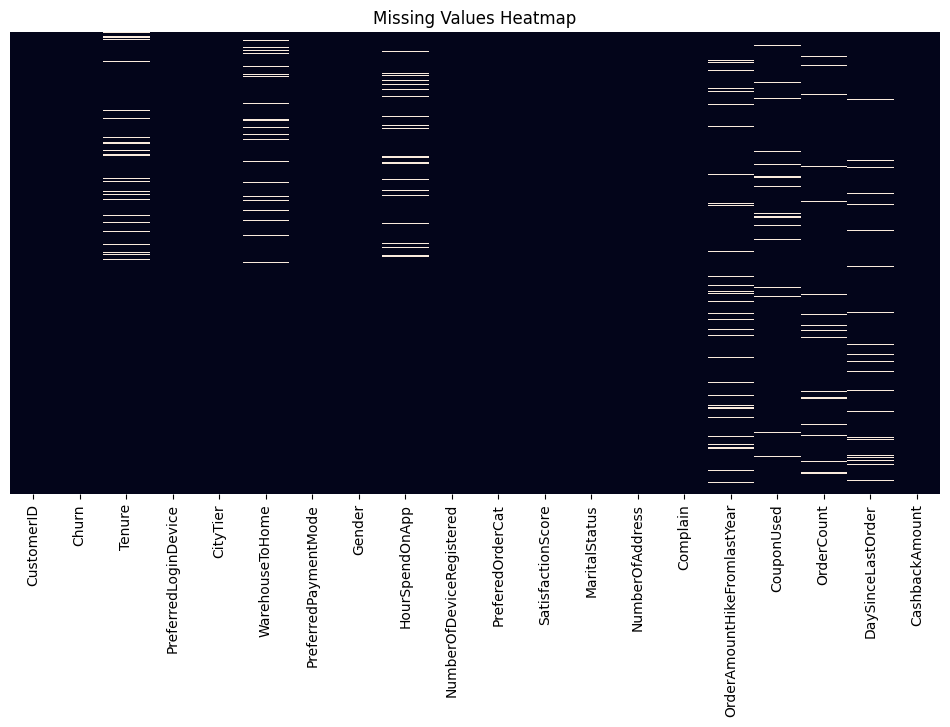

In [166]:
# Missing value analysis
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
print("Missing values:\n", pd.DataFrame({'count': missing_values, 'percent': missing_percent}).sort_values(by='count', ascending=False))

# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [167]:
# Impute numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Impute categorical columns
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Verify no missing values left
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [168]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'Churn' from numerical columns (it's our target variable)
num_cols.remove('Churn')

print("Numerical Columns:", num_cols)
print("\nCategorical Columns:", cat_cols)

Numerical Columns: ['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Categorical Columns: ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


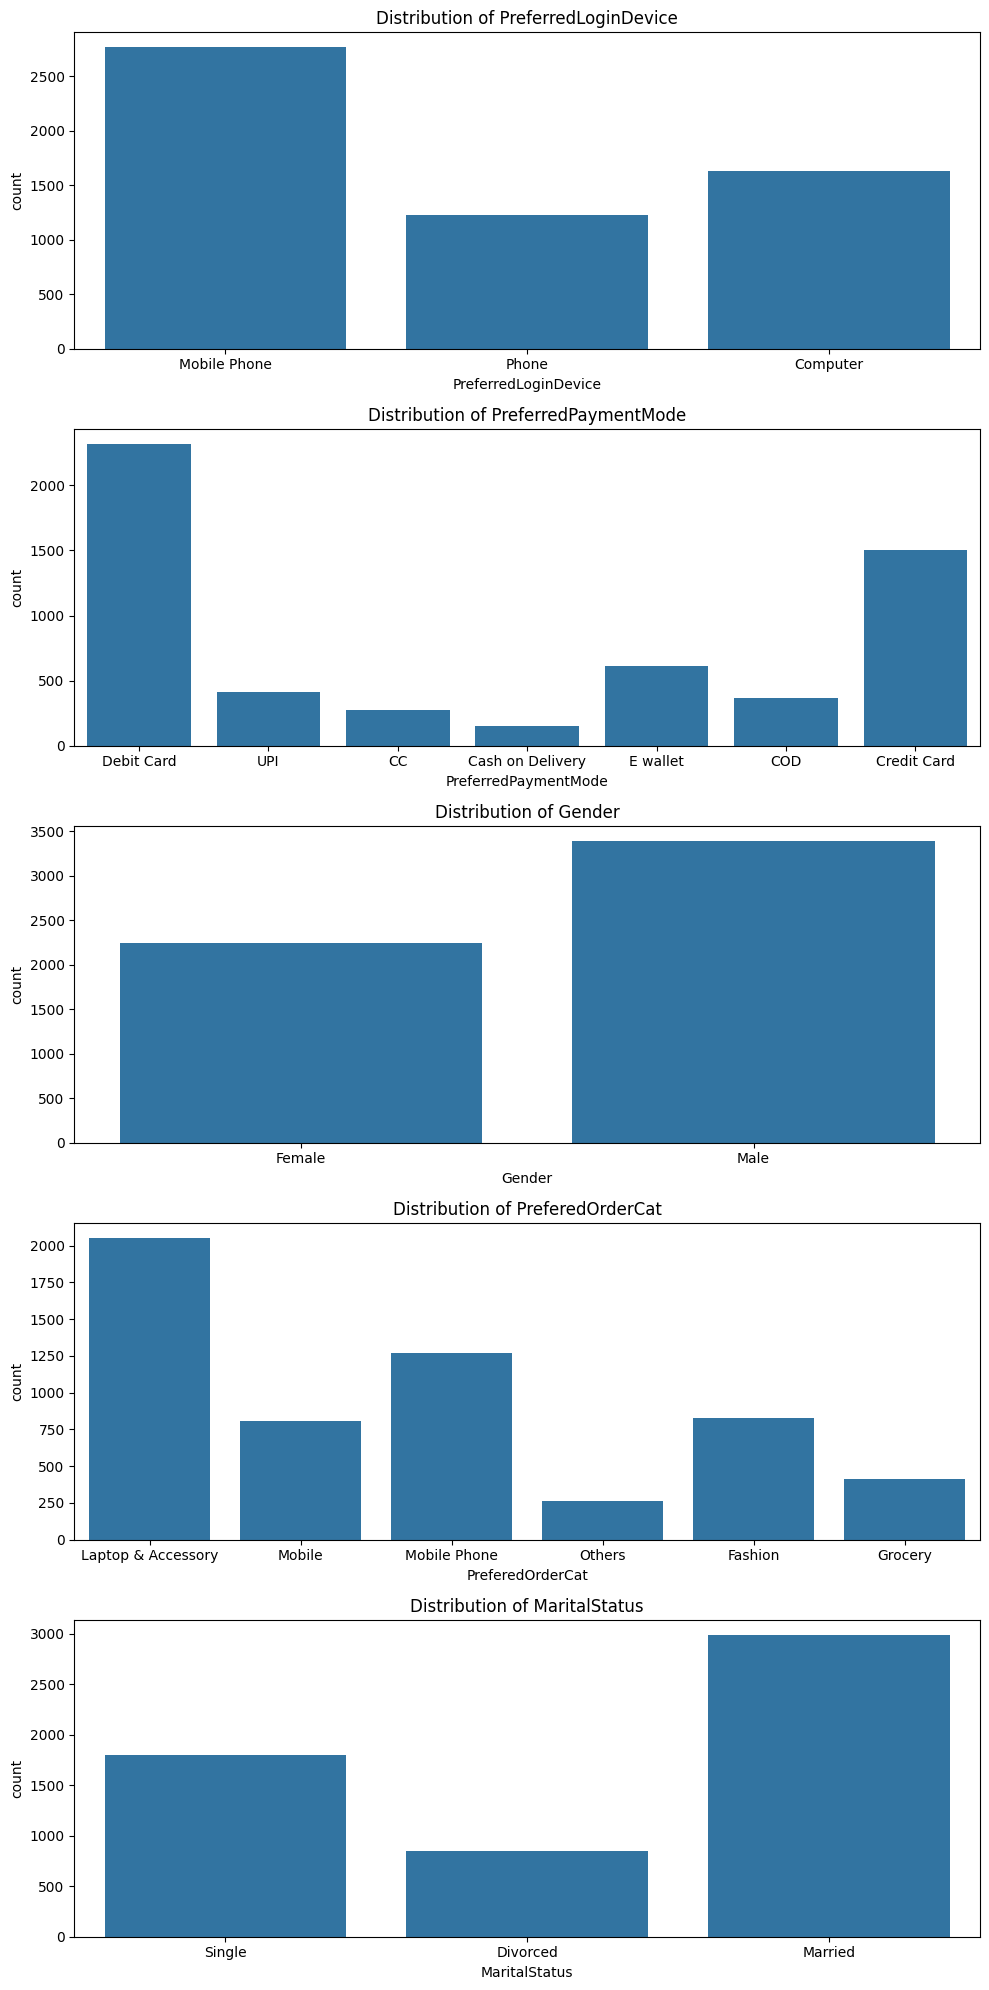


=== PreferredLoginDevice ===
Unique Values: ['Mobile Phone' 'Phone' 'Computer']

Churn Rate by Category:
PreferredLoginDevice
Phone          0.22
Computer       0.20
Mobile Phone   0.13
Name: Churn, dtype: float64

=== PreferredPaymentMode ===
Unique Values: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Churn Rate by Category:
PreferredPaymentMode
COD                0.29
E wallet           0.23
CC                 0.22
UPI                0.17
Cash on Delivery   0.15
Debit Card         0.15
Credit Card        0.13
Name: Churn, dtype: float64

=== Gender ===
Unique Values: ['Female' 'Male']

Churn Rate by Category:
Gender
Male     0.18
Female   0.15
Name: Churn, dtype: float64

=== PreferedOrderCat ===
Unique Values: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

Churn Rate by Category:
PreferedOrderCat
Mobile Phone         0.28
Mobile               0.27
Fashion              0.15
Laptop & Accessory   0.10
Others               0

In [169]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(cat_cols), figsize=(10, 20))

# Plot value counts and churn rate per category
for i, col in enumerate(cat_cols):
    # Value counts
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    plt.tight_layout()

plt.show()

# Check unique values and churn rate per category
for col in cat_cols:
    print(f"\n=== {col} ===")
    print("Unique Values:", df[col].unique())
    print("\nChurn Rate by Category:")
    print(df.groupby(col)['Churn'].mean().sort_values(ascending=False))

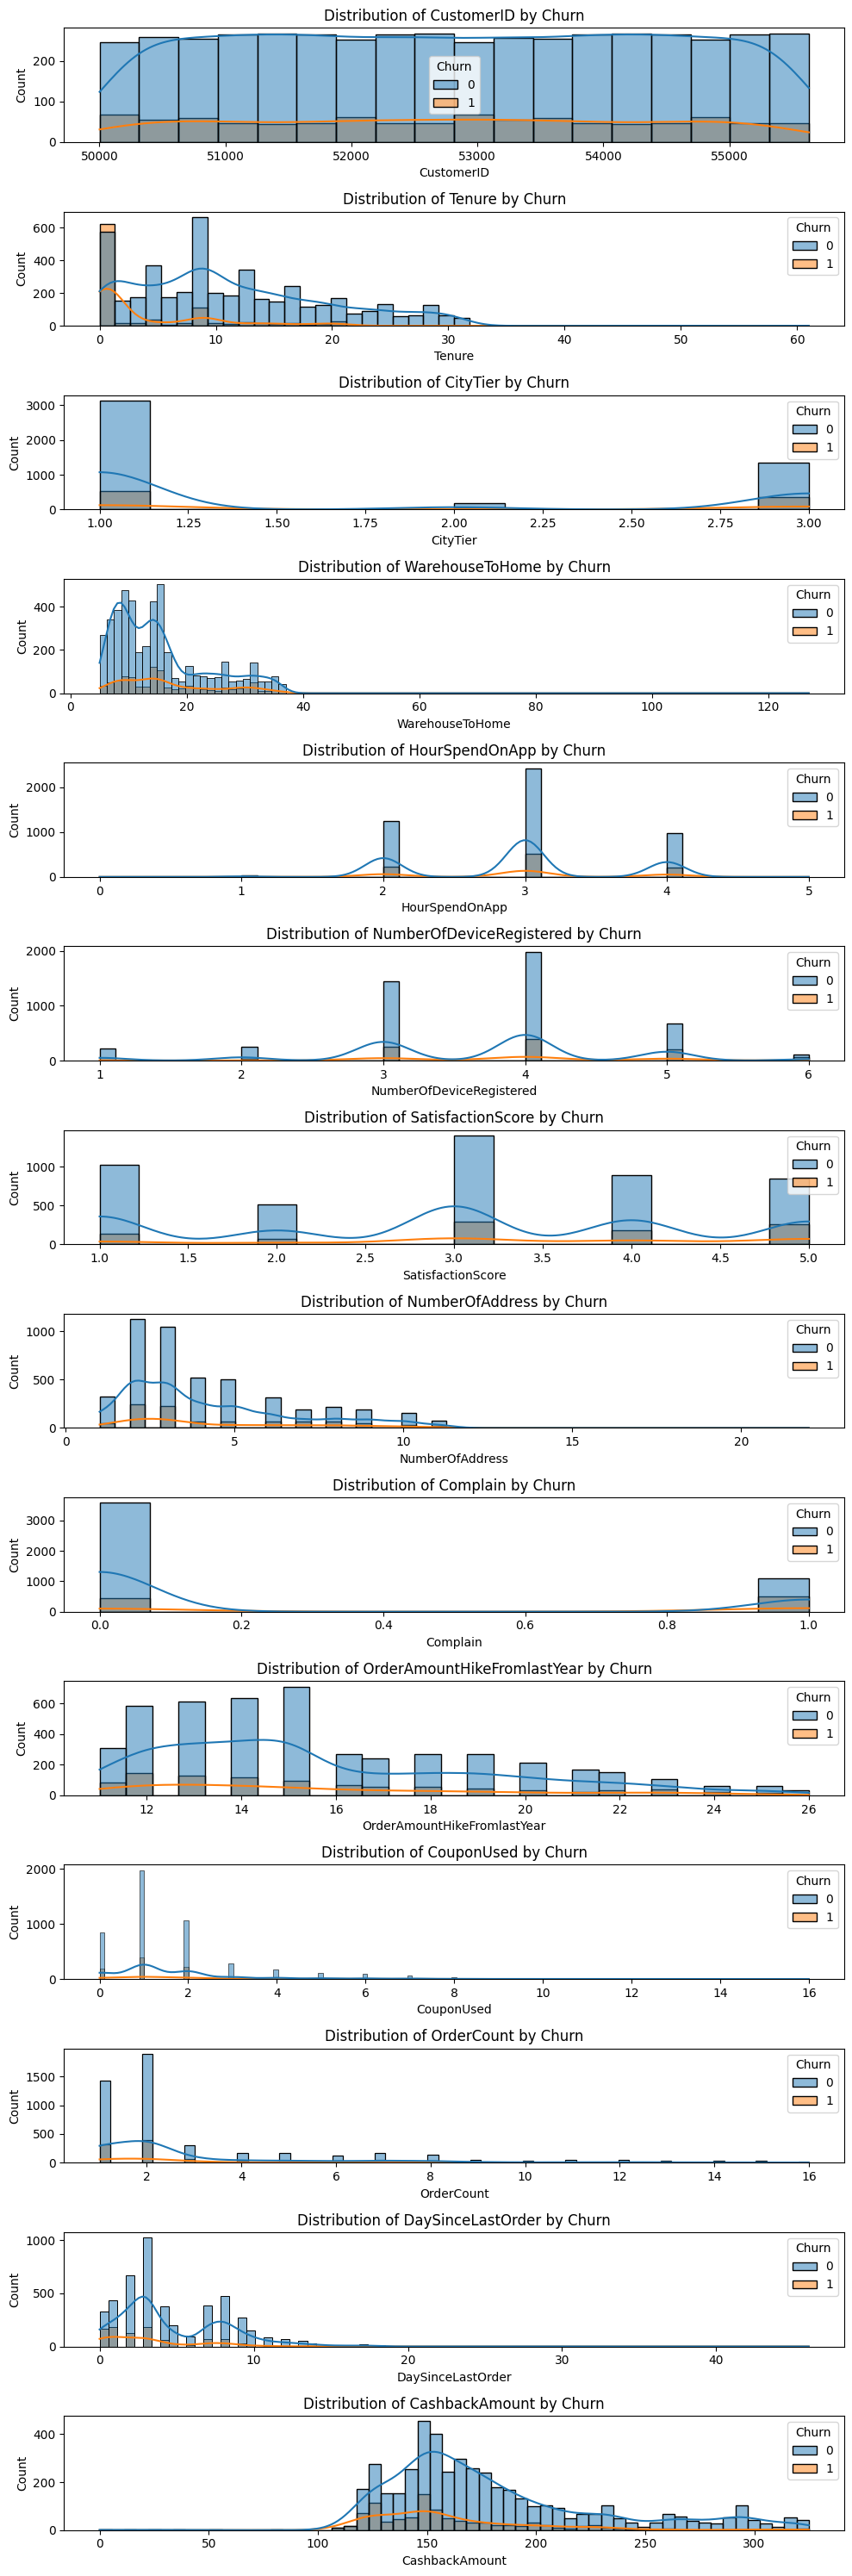

Correlation with Churn:
Complain                       0.25
NumberOfDeviceRegistered       0.11
SatisfactionScore              0.11
CityTier                       0.08
WarehouseToHome                0.07
NumberOfAddress                0.04
HourSpendOnApp                 0.02
CouponUsed                    -0.00
OrderAmountHikeFromlastYear   -0.01
CustomerID                    -0.02
OrderCount                    -0.02
CashbackAmount                -0.15
DaySinceLastOrder             -0.16
Tenure                        -0.34
dtype: float64


In [170]:
# Plot distributions and churn relationships for numerical variables
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(10, 30))

for i, col in enumerate(num_cols):
    # Distribution plot
    sns.histplot(data=df, x=col, hue='Churn', kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Churn")
    plt.tight_layout()

plt.show()

# Correlation with churn
print("Correlation with Churn:")
print(df[num_cols].corrwith(df['Churn']).sort_values(ascending=False))

In [171]:
# Merge similar categories
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'CC': 'Credit Card',
    'COD': 'Cash on Delivery'
})

df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({
    'Mobile Phone': 'Mobile'
})

# Drop Gender (optional)
df = df.drop('Gender', axis=1)

In [172]:
# Binning Tenure
df['Tenure_Group'] = pd.cut(df['Tenure'], bins=[0, 6, 12, 60], labels=['<6mo', '6-12mo', '>1yr'])

# Create Inactive User Flag
df['Is_Inactive'] = (df['DaySinceLastOrder'] > 30).astype(int)

# Drop weak features
df = df.drop(['CustomerID', 'CouponUsed', 'OrderAmountHikeFromlastYear'], axis=1)

In [173]:
# Separate numerical and categorical columns
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'Churn' from numerical columns (it's our target variable)
num_features.remove('Churn')

print("Numerical Columns:", num_features)
print("\nCategorical Columns:", cat_features)

Numerical Columns: ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Is_Inactive']

Categorical Columns: ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']


In [174]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler and transform
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# Verify
print(df[num_features].describe().round(2))

       Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
count 5630.00   5630.00          5630.00         5630.00   
mean     0.00      0.00             0.00            0.00   
std      1.00      1.00             1.00            1.00   
min     -1.21     -0.72            -1.27           -4.16   
25%     -0.85     -0.72            -0.79           -1.32   
50%     -0.14     -0.72            -0.19            0.09   
75%      0.58      1.47             0.53            0.09   
max      6.09      1.47            13.35            2.93   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
count                   5630.00            5630.00          5630.00   5630.00   
mean                      -0.00              -0.00             0.00     -0.00   
std                        1.00               1.00             1.00      1.00   
min                       -2.63              -1.50            -1.24     -0.63   
25%                       -0.67              -0.77    

In [175]:
# One-Hot Encoding for low-cardinality categoricals
cat_features = ['PreferredLoginDevice', 'PreferredPaymentMode',
                'PreferedOrderCat', 'MaritalStatus', 'Tenure_Group']

df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Verify
print(df.filter(like='_').columns)

Index(['Is_Inactive', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Tenure_Group_6-12mo', 'Tenure_Group_>1yr'],
      dtype='object')


In [176]:
X = df.drop('Churn', axis=1)  # All columns except Churn
y = df['Churn']  # Only the Churn column

In [177]:
from sklearn.model_selection import train_test_split

# Use stratify=y to maintain the same class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # This is the key parameter
)

In [179]:
# 4. Verify distributions
print("\nOriginal Churn Rate:", y.mean().round(3))
print("Train Churn Rate:", y_train.mean().round(3))
print("Test Churn Rate:", y_test.mean().round(3))

# 5. Check feature preservation
print("\nTrain Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)


Original Churn Rate: 0.168
Train Churn Rate: 0.168
Test Churn Rate: 0.169

Train Features Shape: (4504, 26)
Test Features Shape: (1126, 26)


              precision    recall  f1-score   support

           0       0.98      0.89      0.93       936
           1       0.62      0.89      0.73       190

    accuracy                           0.89      1126
   macro avg       0.80      0.89      0.83      1126
weighted avg       0.91      0.89      0.90      1126

AUC-PR: 0.817


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

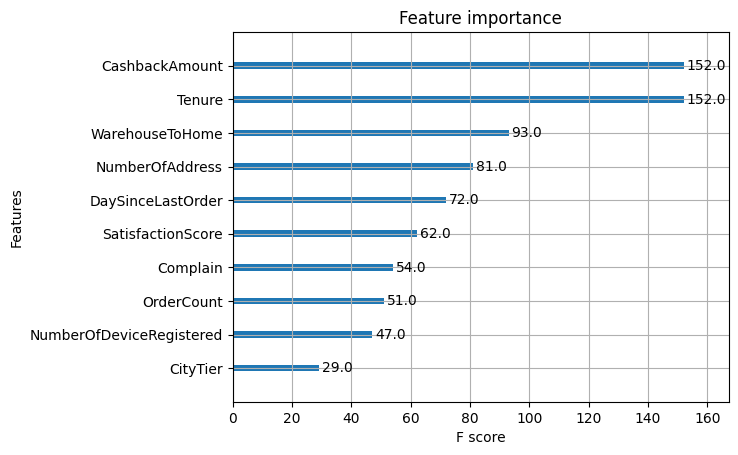

In [180]:
import xgboost as xgb
from sklearn.metrics import classification_report, average_precision_score

# Auto-calculate class weight
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)  # ≈5:1 ratio

# Best starter parameters
model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    objective='binary:logistic',
    n_estimators=150,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='aucpr',  # Optimizes for imbalanced data
    random_state=42
)

# Train
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(f"AUC-PR: {average_precision_score(y_test, y_proba):.3f}")

# Feature importance
xgb.plot_importance(model, max_num_features=10)

In [181]:
from sklearn.metrics import precision_recall_curve

# Find optimal threshold
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
optimal_idx = (precisions * recalls).argmax()  # F1-maximizing threshold
optimal_threshold = thresholds[optimal_idx]

# Re-predict with new threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_optimal))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       936
           1       0.75      0.82      0.79       190

    accuracy                           0.92      1126
   macro avg       0.86      0.88      0.87      1126
weighted avg       0.93      0.92      0.93      1126



In [182]:
# Ensure we only use features the model was trained on
features_for_prediction = X_train.columns.tolist()  # Get original feature names

# Generate predictions (WITHOUT adding new columns first)
churn_probs = model.predict_proba(df[features_for_prediction])[:, 1]

# Now safely add to DataFrame
df['ChurnRisk'] = churn_probs

In [190]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 1. Churn Risk Distribution
fig1 = px.histogram(df, x='ChurnRisk', nbins=20,
                   title='Customer Churn Risk Distribution',
                   labels={'ChurnRisk': 'Predicted Churn Probability'},
                   color_discrete_sequence=['#FF6B6B'])

# 2. Top Churn Drivers
top_features = ['CashbackAmount', 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder', 'Complain']
fig2 = px.bar(x=top_features, y=[152, 152, 93, 72, 54],
             title='Top 5 Churn Drivers',
             labels={'x': 'Features', 'y': 'Importance Score'})

# 3. Customer Segmentation Matrix
df['OrderCount_Visual'] = df['OrderCount'].clip(lower=0) + 1  # Ensure >0
fig3 = px.scatter(df, x='Tenure', y='CashbackAmount',
                 color='ChurnRisk', size='OrderCount_Visual',
                 hover_data=['CityTier', 'PreferredPaymentMode_Credit Card',
                           'PreferredPaymentMode_Debit Card',
                           'PreferredPaymentMode_E wallet',
                           'PreferredPaymentMode_UPI'],
                 title='Customer Risk Segmentation',
                 color_continuous_scale='RdYlGn_r')

# 4. Actionable Insights Table
risk_tiers = df.groupby(pd.cut(df['ChurnRisk'],
                          bins=[0, 0.3, 0.7, 1],
                          labels=['Low', 'Medium', 'High'])).agg({
    'Tenure': 'median',
    'CashbackAmount': 'median',
    'OrderCount': 'median',
    'ChurnRisk': 'size'
}).rename(columns={'ChurnRisk': 'CustomerCount'})

# Create dashboard
dashboard = make_subplots(rows=2, cols=2, subplot_titles=(
    "Churn Risk Distribution",
    "Key Churn Drivers",
    "Customer Risk Segmentation",
    "Risk Tier Statistics"
))

dashboard.add_trace(fig1.data[0], row=1, col=1)
dashboard.add_trace(fig2.data[0], row=1, col=2)
dashboard.add_trace(fig3.data[0], row=2, col=1)

dashboard.update_layout(height=900, showlegend=False)
dashboard.show()

<ipython-input-190-de4bf01e93e5>:29: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [200]:
metrics = {
    "Total Customers": len(df),
    "Current Churn Rate": f"{df['Churn'].mean()*100:.1f}%",
    "At-Risk Customers": f"{len(df[df['ChurnRisk'] > 0.7])} ({len(df[df['ChurnRisk'] > 0.7])/len(df)*100:.1f}%)",
}

print(pd.DataFrame.from_dict(metrics, orient='index', columns=['Value']))

                          Value
Total Customers            5630
Current Churn Rate        16.8%
At-Risk Customers   952 (16.9%)


In [197]:
# Segment customers for email campaigns
def assign_retention_tier(row):
    if row['ChurnRisk'] > 0.7:
        return 'HighRisk: 15% discount + free shipping'
    elif row['ChurnRisk'] > 0.5:
        return 'MediumRisk: 10% discount'
    else:
        return 'LowRisk: Newsletter only'

df['RetentionAction'] = df.apply(assign_retention_tier, axis=1)

In [198]:
df['RetentionAction']


,RetentionAction
0,MediumRisk: 10% discount
1,HighRisk: 15% discount + free shipping
2,HighRisk: 15% discount + free shipping
3,HighRisk: 15% discount + free shipping
4,HighRisk: 15% discount + free shipping
...,...
5625,LowRisk: Newsletter only
5626,LowRisk: Newsletter only
5627,LowRisk: Newsletter only
5628,LowRisk: Newsletter only


In [203]:
# Calculate average potential savings per action
action_impact = df.groupby('RetentionAction', as_index=False).agg({
    'PotentialSavings':'mean',
    'ChurnRisk':'mean'
}).sort_values('PotentialSavings', ascending=False)

# Create dual-axis chart
from plotly.subplots import make_subplots
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Bar(
        x=action_impact['RetentionAction'],
        y=action_impact['PotentialSavings'],
        name='Avg Savings',
        marker_color='#636EFA'
    ),
    secondary_y=False
)

fig.add_trace(
    go.Scatter(
        x=action_impact['RetentionAction'],
        y=action_impact['ChurnRisk'],
        name='Churn Risk',
        mode='lines+markers',
        line=dict(color='#EF553B', width=2)
    ),
    secondary_y=True
)

fig.update_layout(
    title_text="Retention Strategy Impact Analysis",
    xaxis_title="Retention Action",
    yaxis_title="Preventable Revenue Loss ($)",
    yaxis2_title="Churn Probability"
)
fig.show()

In [199]:
# Calculate potential revenue saved
avg_order_value = 100  # Your actual AOV
df['PotentialSavings'] = df['ChurnRisk'] * avg_order_value
print(f"Total preventable loss: ${df['PotentialSavings'].sum():.2f}")


Total preventable loss: $161016.41
